In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from freq_pd import proc_freq

In [4]:
final_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [5]:
stdtypes = {'Store_Number':str,'Vendor_Number':str,'Item_Number':str, 'Category':str,
            'Zip_Code':str}

In [6]:
store_trans_cluster = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_trans_cluster.csv', dtype=stdtypes,index_col=0 )

In [7]:
final_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 1 to 4457
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4301 non-null   object 
 1   Item_Description    4301 non-null   object 
 2   Bottle_Volume       4301 non-null   int64  
 3   Bottle_Retail       4301 non-null   float64
 4   Bottles_Sold        4301 non-null   int64  
 5   cluster_name        4301 non-null   object 
 6   revenue             4301 non-null   float64
 7   Num_Stores_Selling  4301 non-null   int64  
 8   New_Category_Name   4301 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 336.0+ KB


In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

In [9]:
std_retail_price_df = store_trans_cluster.groupby(['Item_Number']).agg({'Bottle_Retail':'std'}).reset_index()


In [10]:
std_retail_price_df.head() 
std_retail_price_df.Bottle_Retail.mean()

0.0

In [11]:
final_clusters.cluster_name.value_counts() 

Most_Variety         2199
Moderately_High       877
Volume_For_Dollar     454
Quick_Shots           436
High_End              157
Cheap                 136
Popular_Bottles        42
Name: cluster_name, dtype: int64

In [12]:
final_clusters.New_Category_Name.value_counts(normalize=True).round(4) *100

Vodkas                                  14.000000000000002
Whiskies                                13.969999999999999
Bourbon                                               8.81
Liquers                                               8.16
Rum                                                   7.95
Temporary & Specialty Packages                        7.21
Tequila                                  7.109999999999999
Special Order Items                                   5.63
Scotch                                                5.46
Brandies                                              4.09
Cocktails                                              4.0
Gin                                     3.9800000000000004
Schnapps                                               3.0
Imported Distilled Spirits Specialty                  1.72
American Distilled Spirits Specialty    1.4000000000000001
Whiskey Liqueur                         1.1900000000000002
Mezcal                                                1.

In [13]:
# ['Temporary & Specialty Packages','Special Order Items',]

In [14]:
final_clusters.loc[final_clusters.cluster_name== 'Most_Variety']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                    0.1709868121873579
Whiskies                                 0.12232833105957254
Liquers                                  0.11596180081855388
Rum                                      0.09822646657571624
Temporary & Specialty Packages           0.06866757617098682
Special Order Items                      0.06730331969076853
Bourbon                                 0.060482037289677125
Tequila                                  0.05638926784902228
Gin                                      0.05229649840836744
Brandies                                 0.04138244656662119
Schnapps                                 0.04001819008640291
Scotch                                    0.0241018644838563
American Distilled Spirits Specialty    0.020009095043201454
Imported Distilled Spirits Specialty    0.013642564802182811
Whiskey Liqueur                          0.01182355616189177
Neutral Grain Spirits Flavored          0.011368804001819008
Cocktails               

In [15]:
final_clusters.loc[final_clusters.cluster_name== 'Moderately_High']['New_Category_Name'].value_counts(normalize=True)

Bourbon                                  0.18244013683010263
Whiskies                                 0.17559863169897377
Scotch                                   0.14139110604332952
Tequila                                   0.1265678449258837
Temporary & Specialty Packages           0.09692132269099202
Special Order Items                      0.06727480045610035
Rum                                      0.03876852907639681
Brandies                                0.036488027366020526
Mezcal                                   0.03192702394526796
Imported Distilled Spirits Specialty    0.029646522234891677
Gin                                     0.019384264538198404
Liquers                                 0.019384264538198404
American Distilled Spirits Specialty    0.014823261117445839
Vodkas                                  0.012542759407069556
Whiskey Liqueur                        0.0034207525655644243
Cocktails                               0.002280501710376283
Distilled Spirits Specia

In [16]:
final_clusters.loc[final_clusters.cluster_name== 'Volume_For_Dollar']['New_Category_Name'].value_counts(normalize=True)

Cocktails                          0.20044052863436124
Vodkas                             0.17180616740088106
Rum                                0.11894273127753303
Whiskies                           0.11233480176211454
Bourbon                            0.06387665198237885
Temporary & Specialty Packages     0.05506607929515418
Gin                                0.05506607929515418
Scotch                            0.046255506607929514
Special Order Items                0.04405286343612335
Tequila                           0.037444933920704845
Liquers                            0.03524229074889868
Brandies                          0.028634361233480177
Schnapps                          0.019823788546255508
Whiskey Liqueur                    0.00881057268722467
Neutral Grain Spirits            0.0022026431718061676
Name: New_Category_Name, dtype: float64

In [17]:
final_clusters.loc[final_clusters.cluster_name== 'Quick_Shots']['New_Category_Name'].value_counts(normalize=True)      

Vodkas                                    0.2018348623853211
Whiskies                                 0.15825688073394495
Cocktails                                0.11926605504587157
Liquers                                  0.11697247706422019
Temporary & Specialty Packages           0.07110091743119266
Bourbon                                  0.06880733944954129
Schnapps                                 0.05963302752293578
Brandies                                 0.05504587155963303
Tequila                                  0.04128440366972477
Rum                                      0.03211009174311927
Imported Distilled Spirits Specialty     0.01834862385321101
Gin                                      0.01834862385321101
Whiskey Liqueur                         0.013761467889908258
Scotch                                  0.009174311926605505
Special Order Items                     0.009174311926605505
American Distilled Spirits Specialty   0.0045871559633027525
Neutral Grain Spirits   

In [18]:
final_clusters.loc[final_clusters.cluster_name == 'High_End']['New_Category_Name'].value_counts(normalize=True)      

Scotch                                  0.21019108280254778
Tequila                                 0.15286624203821655
Whiskies                                0.15286624203821655
Temporary & Specialty Packages          0.10828025477707007
Bourbon                                 0.08280254777070063
Special Order Items                     0.07006369426751592
Imported Distilled Spirits Specialty   0.050955414012738856
Mezcal                                  0.03821656050955414
Rum                                     0.03184713375796178
Cocktails                              0.025477707006369428
Brandies                                0.01910828025477707
Liquers                                0.012738853503184714
Whiskey Liqueur                        0.012738853503184714
Vodkas                                 0.012738853503184714
Gin                                    0.006369426751592357
Neutral Grain Spirits                  0.006369426751592357
American Distilled Spirits Specialty   0

In [19]:
final_clusters.loc[final_clusters.cluster_name== 'Cheap']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                                 0.25
Whiskies                                0.16176470588235295
Bourbon                                 0.10294117647058823
Rum                                     0.09558823529411764
Brandies                                0.08088235294117647
Tequila                                 0.08088235294117647
Liquers                                 0.07352941176470588
Gin                                     0.03676470588235294
Schnapps                                0.03676470588235294
Whiskey Liqueur                        0.029411764705882353
Triple Sec                             0.022058823529411766
Temporary & Specialty Packages         0.007352941176470588
Neutral Grain Spirits                  0.007352941176470588
Imported Distilled Spirits Specialty   0.007352941176470588
Neutral Grain Spirits Flavored         0.007352941176470588
Name: New_Category_Name, dtype: float64

In [20]:
final_clusters.loc[final_clusters.cluster_name== 'Popular_Bottles']['New_Category_Name'].value_counts(normalize=True)

Vodkas                                  0.30952380952380953
Whiskies                                 0.2857142857142857
Rum                                     0.14285714285714285
Whiskey Liqueur                         0.14285714285714285
Brandies                               0.047619047619047616
Imported Distilled Spirits Specialty   0.023809523809523808
Schnapps                               0.023809523809523808
Tequila                                0.023809523809523808
Name: New_Category_Name, dtype: float64

In [21]:
final_clusters.loc[(final_clusters.cluster_name== 'Popular_Bottles') & (final_clusters.New_Category_Name == 'Tequila')]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name
2772,88296,Patron Silver,750,41.5222314936226,144787,Popular_Bottles,"6,001,266.0",1274,Tequila


look at within cluster revenue by product type

In [22]:
store_trans_cluster.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473851 entries, 0 to 2473850
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Store_Number        object 
 1   Store_Name          object 
 2   Address             object 
 3   City                object 
 4   Zip_Code            object 
 5   Store_Location      object 
 6   County_Number       int64  
 7   County              object 
 8   Vendor_Number       object 
 9   Item_Number         object 
 10  Category            object 
 11  Item_Description    object 
 12  Bottle_Volume       int64  
 13  Bottle_Retail       float64
 14  Bottles_Sold        int64  
 15  cluster_name        object 
 16  revenue             float64
 17  Num_Stores_Selling  int64  
 18  New_Category_Name   object 
dtypes: float64(2), int64(4), object(13)
memory usage: 377.5+ MB


In [23]:
round(store_trans_cluster.groupby(['New_Category_Name'])['revenue'].sum() / store_trans_cluster.revenue.sum()*100,2).to_frame().sort_values(by='revenue', ascending=False)

,revenue
New_Category_Name,
Vodkas,31.27
Whiskies,30.19
Rum,10.43
Whiskey Liqueur,7.2
Tequila,5.08
Bourbon,4.63
Brandies,4.0
Liquers,2.7
Schnapps,1.52


In [24]:
list_other = ['Temporary & Specialty Packages', 'Neutral Grain Spirits Flavored', 'Neutral Grain Spirits', 'American Distilled Spirits Specialty', 
 'Imported Distilled Spirits Specialty', 'Special Order Items', 'Distilled Spirits Specialty']


In [25]:
# ['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]

# len(['Other' if categ in list_other else categ for categ in store_trans_cluster.New_Category_Name])
store_trans_cluster['New_Category_Name_2'] = ['Other' if categ in list_other else categ for categ in store_trans_cluster.New_Category_Name]

In [26]:
iowa = round(store_trans_cluster.groupby(['New_Category_Name_2'])['revenue'].sum() / store_trans_cluster.revenue.sum()*100,2).to_frame().sort_values(by='revenue', ascending=False).reset_index()

[Text(0.5, 1.0, 'Iowa')]

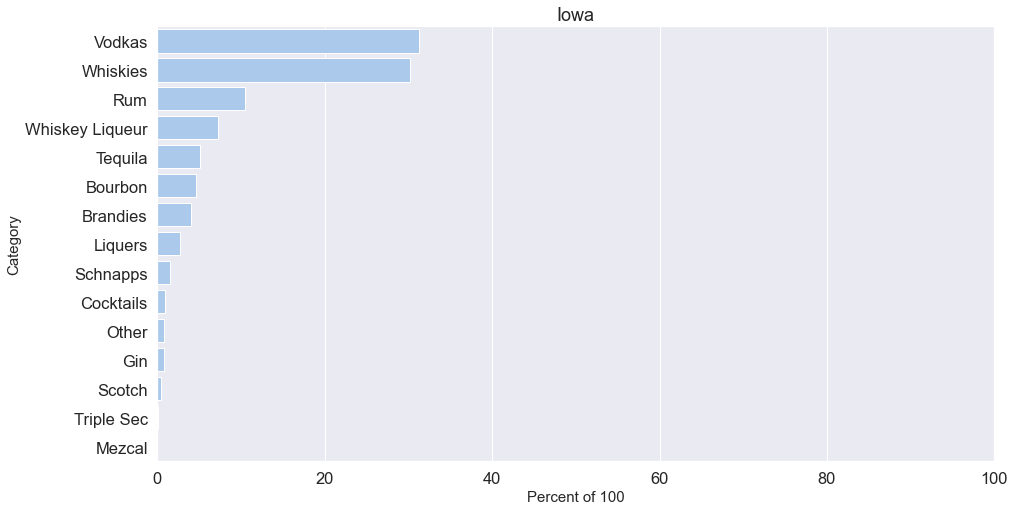

In [27]:
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="revenue", y="New_Category_Name_2", data=iowa,
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of 100',fontsize=15)
bar.set_ylabel('Category',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Iowa')


In [28]:
store_trans_cluster.shape

(2473851, 20)

In [29]:
tot_revenue_clusters = store_trans_cluster.groupby(['cluster_name']).agg({'revenue':'sum'})

In [30]:
tot_revenue_clusters = tot_revenue_clusters.reset_index()

In [31]:
# rename columns
tot_revenue_clusters.columns = ['cluster_name','cluster_total_revenue']
tot_revenue_clusters

,cluster_name,cluster_total_revenue
0,Cheap,"398,775,088,141.05"
1,High_End,"1,063,769,105.46"
2,Moderately_High,"19,697,935,241.34"
3,Most_Variety,"108,699,996,632.98"
4,Popular_Bottles,"1,361,968,771,503.28"
5,Quick_Shots,"23,198,511,203.05"
6,Volume_For_Dollar,"258,238,368,070.33002"


In [32]:
cluster_revenue_by_New_Category_Name = store_trans_cluster.groupby(['cluster_name','New_Category_Name_2']).agg({'revenue':'sum','Item_Number':'nunique'})  

In [33]:
cluster_revenue_by_New_Category_Name = cluster_revenue_by_New_Category_Name.reset_index()

In [34]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

cluster_revenue_by_New_Category_Name.head()

,cluster_name,New_Category_Name_2,revenue,Item_Number
0,Cheap,Bourbon,"66,614,259,808.74",14
1,Cheap,Brandies,"39,855,678,524.59",11
2,Cheap,Gin,"6,583,933,052.59",5
3,Cheap,Liquers,"34,647,074,330.19",10
4,Cheap,Other,"11,949,980,366.49",4


In [35]:
# us.merge(census_combined4,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')
cluster_revenue_pct = cluster_revenue_by_New_Category_Name.merge(tot_revenue_clusters, how='inner')

In [36]:
cluster_revenue_pct.head()

,cluster_name,New_Category_Name_2,revenue,Item_Number,cluster_total_revenue
0,Cheap,Bourbon,"66,614,259,808.74",14,"398,775,088,141.05"
1,Cheap,Brandies,"39,855,678,524.59",11,"398,775,088,141.05"
2,Cheap,Gin,"6,583,933,052.59",5,"398,775,088,141.05"
3,Cheap,Liquers,"34,647,074,330.19",10,"398,775,088,141.05"
4,Cheap,Other,"11,949,980,366.49",4,"398,775,088,141.05"


In [37]:
cluster_revenue_pct['revenue_pct'] = round(cluster_revenue_pct.revenue / cluster_revenue_pct.cluster_total_revenue *100,2)

In [38]:
# cluster_revenue_pct.rename({'New_Category_Name':'Category'})

In [39]:
new_product_clusters_dict = {'Cheap':'Moderately_Priced',
                         'Moderately_High':'Expensive','Most_Variety':'Most_Variety','Popular_Bottles':'Popular_Bottles',
                        'Volume_For_Dollar':'Volume_For_Dollar','High_End':'High_End','Quick_Shots':'Quick_Shots'}


In [40]:
cluster_revenue_pct['new_prod_clust_name'] = cluster_revenue_pct['cluster_name'].map(new_product_clusters_dict)

### Cheap 

In [41]:
# Cheap
Moderately_Priced_df = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Cheap',['new_prod_clust_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)
Moderately_Priced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 11 to 8
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   new_prod_clust_name  12 non-null     object 
 1   New_Category_Name_2  12 non-null     object 
 2   revenue_pct          12 non-null     float64
 3   Item_Number          12 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 480.0+ bytes


In [42]:
# sns.set(font_scale=1.5)
# sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
# sns.set_color_codes("pastel")
# bar = sns.barplot(x="revenue_pct", y="New_Category_Name_2", data=Moderately_Priced_df,
#             label="Total", color="b")
# # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
# bar.set_xlabel('Percent of 100',fontsize=15)
# bar.set_ylabel('Category',fontsize=15)
   
# bar.set(xlim=(0,100))
# bar.set(title='Moderately Priced')


In [61]:
def make_bar(df, title=None):    
    sns.set(font_scale=1.5)
    sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
    sns.set_color_codes("pastel")
    bar = sns.barplot(x="revenue_pct", y="New_Category_Name_2", data=df,
                label="Total", color="b")
    # bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
    bar.set_xlabel('Percent of Cluster Total Revenue ',fontsize=15)
    bar.set_ylabel('Category',fontsize=15)

    bar.set(xlim=(0,100))
    if title:
        bar.axes.set_title(title,fontsize=25)


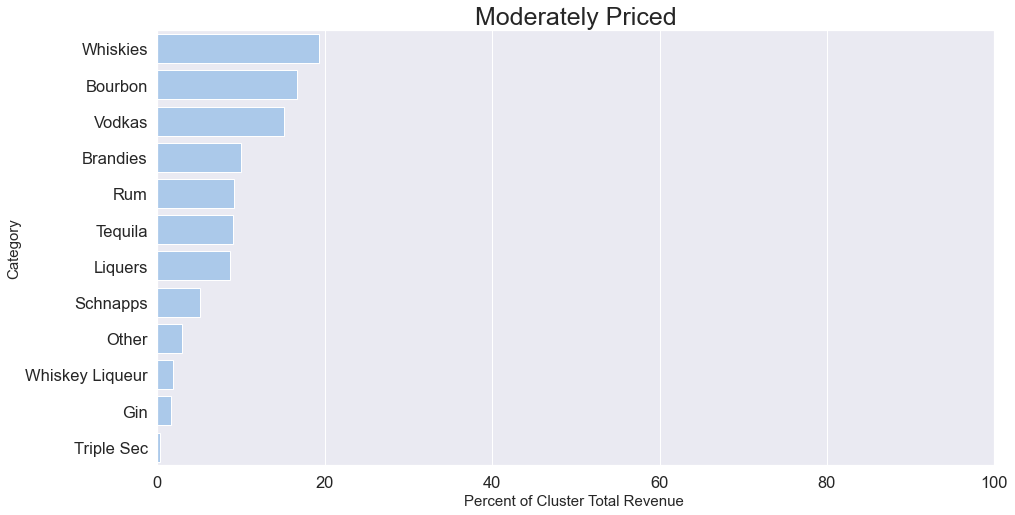

In [62]:
make_bar(Moderately_Priced_df,title='Moderately Priced')

In [45]:
# High_End
High_End = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'High_End',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

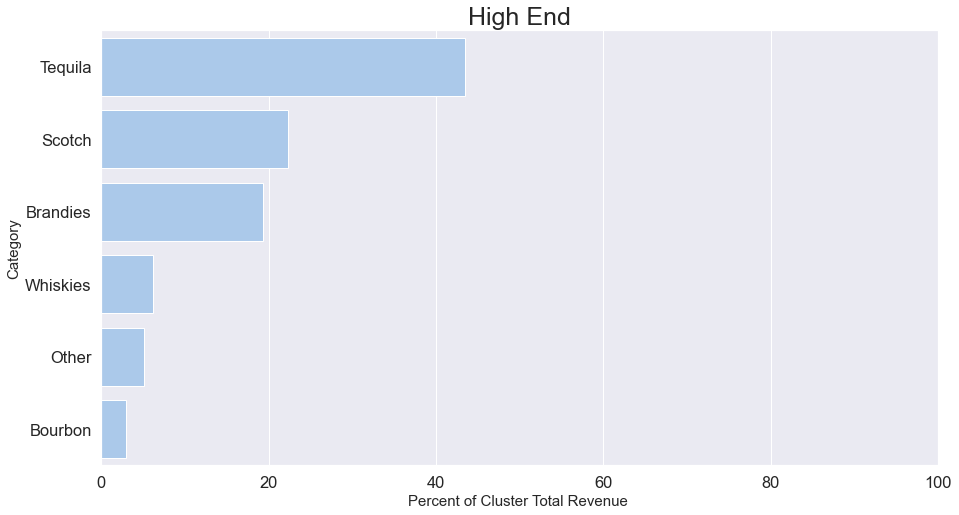

In [63]:
make_bar(High_End.loc[High_End.revenue_pct >= 1],title='High End')

In [47]:
# Moderately_High
Expensive = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Moderately_High',['new_prod_clust_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

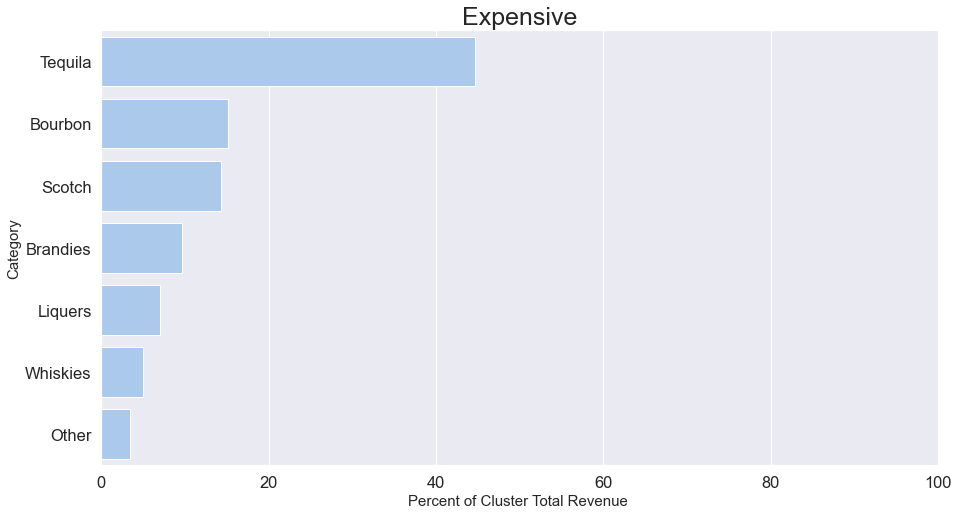

In [64]:
# bar(Expensive.loc[Expensive.revenue_pct >= 1],title='Expensive')
make_bar(Expensive.loc[Expensive.revenue_pct >= 1],title='Expensive')

In [49]:
type(bar)

matplotlib.axes._subplots.AxesSubplot

In [50]:
# Most_Variety
Most_Variety = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Most_Variety',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

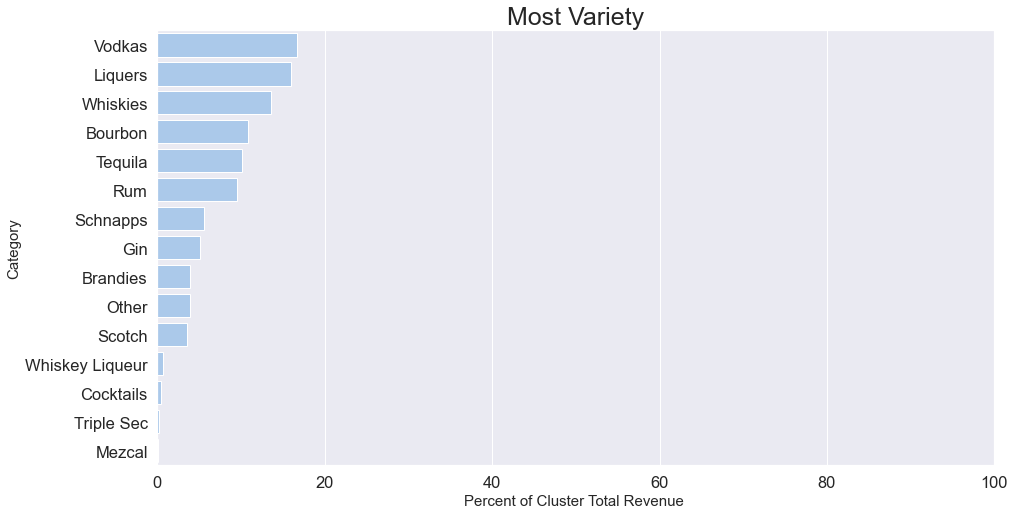

In [65]:
make_bar(Most_Variety,title='Most Variety')

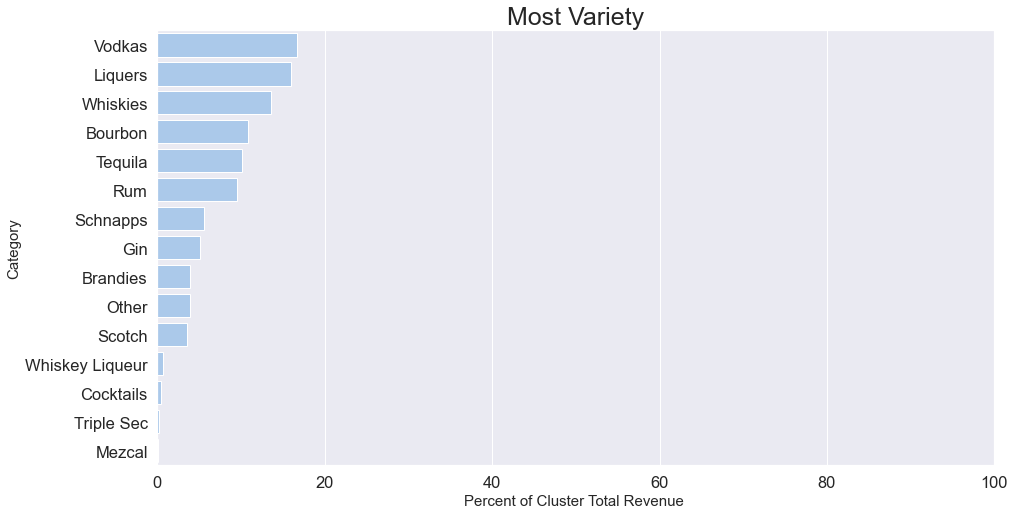

In [66]:
make_bar(Most_Variety,title='Most Variety')

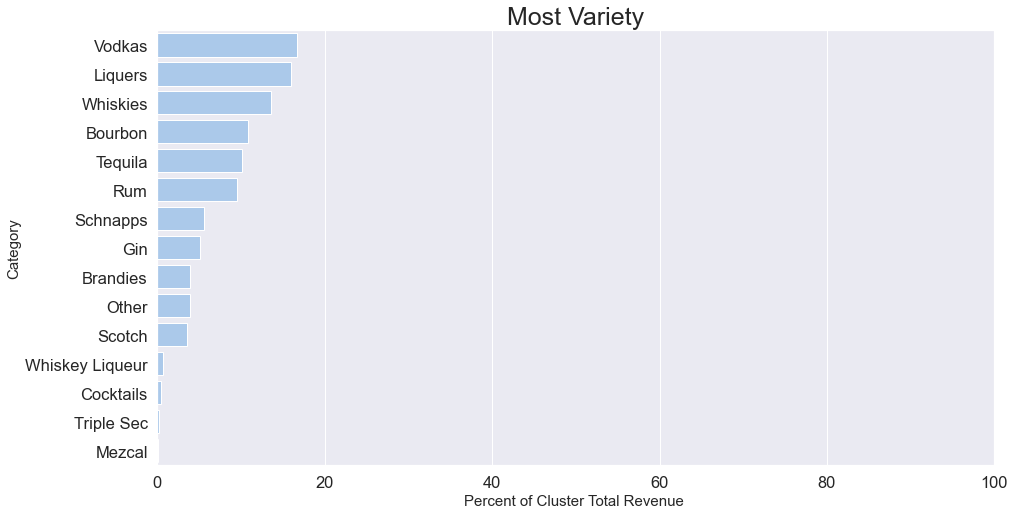

In [67]:
make_bar(Most_Variety,title='Most Variety')

In [54]:
# Popular_Bottles
Popular_Bottles = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Popular_Bottles',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

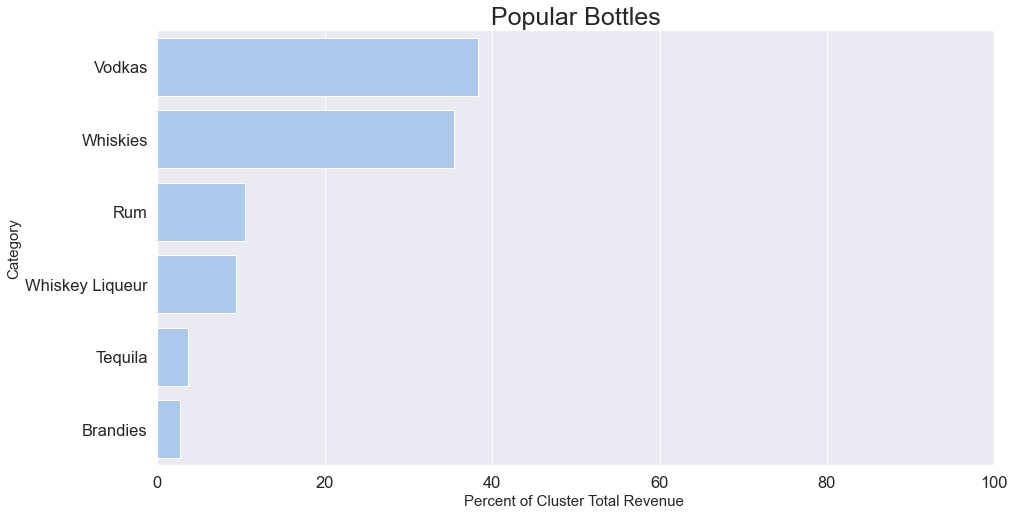

In [68]:
make_bar(Popular_Bottles.loc[Popular_Bottles.revenue_pct >= 1],title='Popular Bottles')

In [56]:
# Quick_Shots
Quick_Shots = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Quick_Shots',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

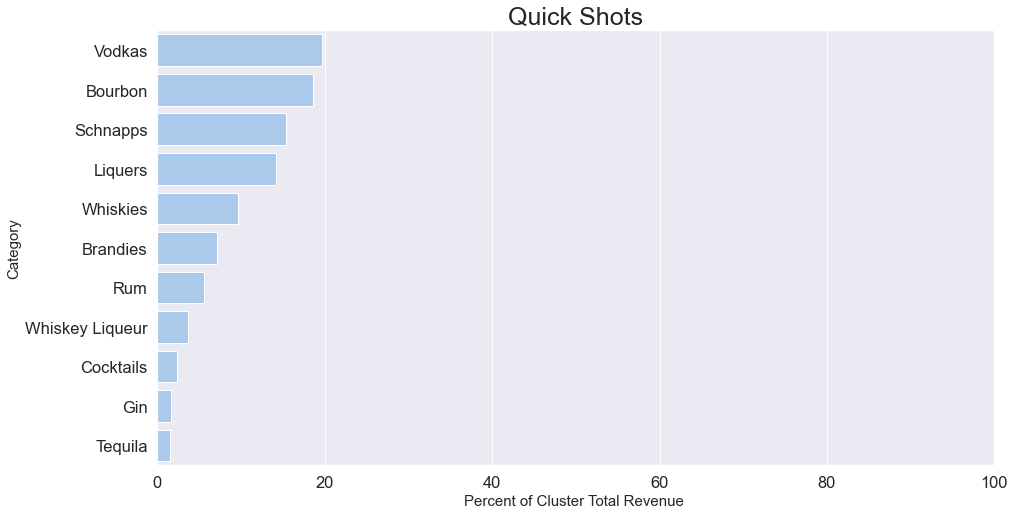

In [71]:
make_bar(Quick_Shots.loc[Quick_Shots.revenue_pct >= 0.5],title='Quick Shots')

In [58]:
# Volume_For_Dollar
Volume_For_Dollar = cluster_revenue_pct.loc[cluster_revenue_pct.cluster_name == 'Volume_For_Dollar',['cluster_name','New_Category_Name_2','revenue_pct','Item_Number']].sort_values(by='revenue_pct',ascending=False)

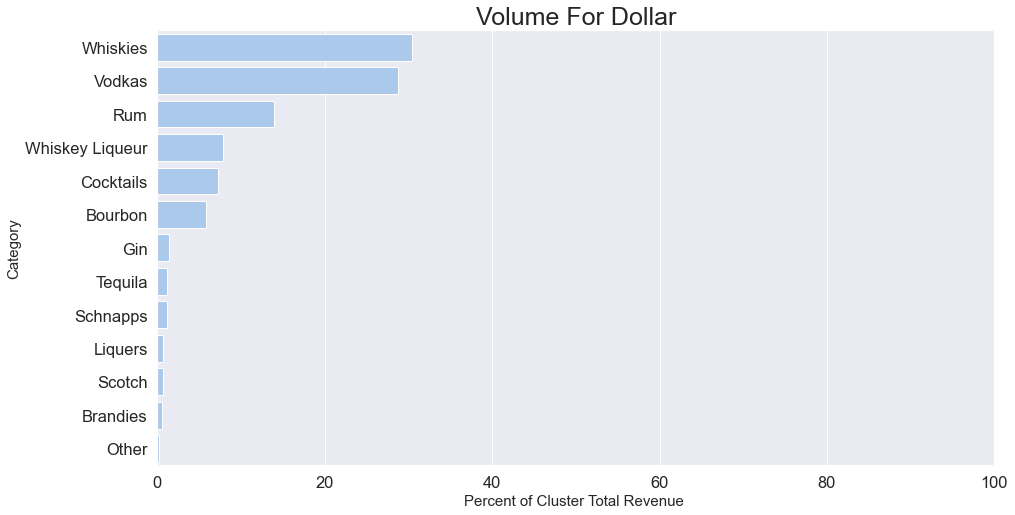

In [70]:
make_bar(Volume_For_Dollar,title='Volume For Dollar')